# Stats 202C

## Monte Carlo Methods (Ch. 7)

## Peter Racioppo

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

import random
import math
from scipy.linalg import eig

### Problem 1.
### Consider the Markov kernel for the five families living in a pacific island, with slightly changed numbers.

In [3]:
K = np.array([[0.1, 0.8, 0.1, 0.0, 0.0],
              [0.3, 0.0, 0.7, 0.0, 0.0],
              [0.1, 0.6, 0.0, 0.3, 0.0],
              [0.0, 0.0, 0.1, 0.6, 0.3],
              [0.0, 0.0, 0.2, 0.4, 0.4]])

### This transition matrix defines a directed graph G = <V,E> where V = {1, 2, 3, 4, 5} is the set of states, and
### E = {e = (x,y) : K(x,y) > 0} is a set of directed edges.

### (1.) Draw the graph G and calculate the invariant probability π(x) for the five states x ∈ {1, 2, 3, 4, 5}; and compute the value of λ_slem.

In [4]:
def f_Plot_Graph(G0):
    import networkx as nx
    n = np.shape(G0)[0]
    options = {'node_color': 'gray'}
    G = nx.DiGraph()
    for i in range(n):
        for j in range(n):
            if G0[i][j] == 1:
                G.add_edge(i,j)
    import matplotlib.pyplot as plt
    nx.draw(G, with_labels=True, font_weight='bold', **options)
    plt.show()

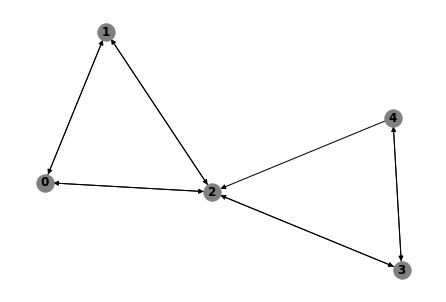

In [8]:
import warnings
warnings.filterwarnings("ignore")

adj = np.double((K>0))
f_Plot_Graph(adj)

In [6]:
# import networkx as nx
# G = nx.from_numpy_matrix(np.matrix(K), create_using=nx.DiGraph)
# layout = nx.spring_layout(G)
# nx.draw(G, layout)
# nx.draw_networkx_edge_labels(G, pos=layout)
# plt.show()

In [8]:
# This function computes the stationary
# distribution of a matrix K.
def f_Stationary(K):
    # Get eigenvals and left and right eigenvecs:
    w, vl, vr = eig(K, left=True)
    # Get indices of eigenvals by largest modulus:
    idx = np.abs(w).argsort()[::-1]
    # Sort eigenvals/vecs by largest modulus:
    w = w[idx]
    vl = vl[:,idx]
    vr = vr[:,idx]
    u1 = vl[:,0] # First left eigenvec
    v1 = vr[:,0] # First right eigenvec
    Kn = np.real(np.multiply.outer(v1, u1)) # K^n
    pi1 = Kn[0,:] # Stationary distribution
    
    nu = np.ones(np.shape(K)[0])/np.shape(K)[0]
    Kn2 = np.linalg.matrix_power(K,1000)
    pi2 = np.matmul(nu,Kn)
    
    # Renormalize (not sure why this is necessary?)
    pi1 = pi1/np.sum(pi1)
    pi2 = pi2/np.sum(pi2)
    
    return pi1, pi2

In [15]:
# This function computes the stationary
# distribution of a matrix K.
def f_Stationary2(K):
    import warnings
    warnings.filterwarnings("ignore")
    n = K.shape[0]
    A = (np.eye(n) - K).T
    a = np.vstack((A, np.ones(n)))
    b = np.matrix([0]*n + [1]).T
    pi = np.linalg.lstsq(a,b)[0].T
    return np.squeeze(np.asarray(pi))

In [16]:
# w: The eigenvalues, each repeated according to its multiplicity.
w, vl, vr = eig(K, left=True)
    
# Get indices of eigenvals by largest modulus:
idx = np.abs(w).argsort()[::-1]
# Sort eigenvals/vecs by largest modulus:
w = w[idx]

print("The eigenvalues of K are:")
print(w)

The eigenvalues of K are:
[ 1.        +0.j  0.77309315+0.j -0.74733351+0.j  0.11149688+0.j
 -0.03725652+0.j]


In [17]:
# All three methods for computing pi return the same answer:
pi1,pi2 = f_Stationary(K)
pi = f_Stationary2(K)

# print(pi1)
# print(np.matmul(pi1,K)-pi1)
# print(np.sum(pi1))

print("The invariant probability of K is:")
print(pi)
# print(np.matmul(pi,K)-pi)
# print(np.sum(pi))

The invariant probability of K is:
[0.09195402 0.20361248 0.21674877 0.32512315 0.16256158]


In [18]:
lambda_slem = np.sqrt(np.real(w[1])**2 + np.imag(w[1])**2)

# 'abs' does the same thing:
lambda_slem = np.abs(w[1])
print("λ_slem = ", lambda_slem)

λ_slem =  0.7730931498158939


### Now we’ll try to verify the bounds of λ_slem by the following two concepts that we studied in this chapter – bottleneck and conductance.

### (2.) Which edge e = (x,y) is the bottleneck of G? (you may make a guess based on the graph connectivity first, and then calculate by its definition); and calculate the Bottleneck κ of the graph G. Verify the Poincare inequality:
### λ_slem ≤ 1− 1/κ.

In [19]:
# Adjacency matrix of K:
G = np.double((K>0))
# print(G)
num_edges = int(np.sum(G)) # Number of edges
# print(num_edges)

In [20]:
# Find the number of edges in an adjacency matrix and store them in edge_vec.
def f_edges(G):
    n = np.shape(G)[0]
    edge_vec = []
    for i in np.arange(n):
        for j in np.arange(n):
            if G[i,j]==1:
                edge_vec.append([i,j])
    return edge_vec

In [21]:
edge_vec_G = f_edges(G)

print(edge_vec_G)
print("Number of edges = ", np.shape(edge_vec_G)[0])

[[0, 0], [0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [3, 2], [3, 3], [3, 4], [4, 2], [4, 3], [4, 4]]
Number of edges =  14


In [22]:
# Build G0 matrix:
# (Each vertex in G0 is an edge in G. Vertices in G0 have an edge between them
# if and only if the corresponding edges in G meet at some vertex.)
G0 = np.zeros((num_edges,num_edges))
for i in np.arange(num_edges):
    for j in np.arange(num_edges):
       if edge_vec_G[i][1] == edge_vec_G[j][0]:
            G0[i,j] = 1
G0

array([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

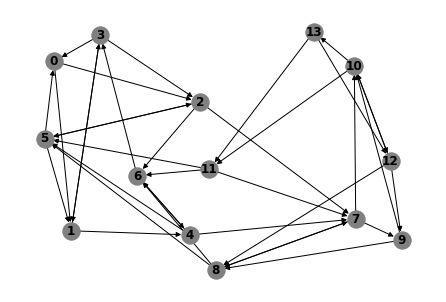

In [412]:
f_Plot_Graph(G0)

In [23]:
# Compute a list of the edges in G0:
edge_vec_G0 = f_edges(G0)

print(edge_vec_G0)
print("Number of edges = ", np.shape(edge_vec_G0)[0])

[[0, 0], [0, 1], [0, 2], [1, 3], [1, 4], [2, 5], [2, 6], [2, 7], [3, 0], [3, 1], [3, 2], [4, 5], [4, 6], [4, 7], [5, 0], [5, 1], [5, 2], [6, 3], [6, 4], [7, 8], [7, 9], [7, 10], [8, 5], [8, 6], [8, 7], [9, 8], [9, 9], [9, 10], [10, 11], [10, 12], [10, 13], [11, 5], [11, 6], [11, 7], [12, 8], [12, 9], [12, 10], [13, 11], [13, 12], [13, 13]]
Number of edges =  40


In [25]:
# (Finding the set of all simple paths is an NP-hard problem.)

# Build G0 as a networkx object:
import networkx as nx
G0_nx = nx.DiGraph() # Build a directed graph
G0_nx.add_nodes_from(np.arange(num_edges)) # Add 14 nodes
G0_nx.add_edges_from(edge_vec_G0) # Add the edges in G0

# Check the nodes and edges:
# print(G0_nx.number_of_nodes())
# print(G0_nx.number_of_edges())
# G0_nx.edges()

In [69]:
# Find the simple paths in G0 from source to target:
def f_simple_paths_ij(G0,source,target):
    i = 0
    simple_paths = []
    for path in nx.all_simple_paths(G0, source=source, target=target):
        simple_paths.append(path)
        i += 1
    return simple_paths

In [137]:
# Find all simple paths in G0
simple_paths_list = []
# Loop through all sources and targets.
for source in np.arange(num_edges):
    for target in np.arange(num_edges):
        if source != target:
            simple_paths_list.append(f_simple_paths_ij(G0_nx,source,target))

simple_paths = np.array([i for sublist in simple_paths_list for i in sublist]) # Flatten the list

# We want the unique simple paths.
# (In fact, we don't need this line. They're unique by construction.)
# simple_paths = np.unique(simple_paths)

L = np.shape(simple_paths)[0] # The number of simple paths in G0
print("There are", L, "simple paths.")

# Convert to array of arrays:
for i in np.arange(L):
    simple_paths[i] = np.array(simple_paths[i])
print(simple_paths)

There are 18050 simple paths.
[array([0, 1]) array([0, 2, 5, 1]) array([0, 2, 6, 3, 1]) ...
 array([13, 11,  7,  9, 10, 12]) array([13, 11,  7, 10, 12])
 array([13, 12])]


In [198]:
# Given an edge and the list of all simple_paths,
# this function finds all simple paths which do
# not contain that edge:
def f_Gamma_e(edge,simple_paths):
    L = np.shape(simple_paths)[0]
    Paths = []
    for i in np.arange(L):
        if edge not in simple_paths[i]:
            Paths.append(simple_paths[i])
    return Paths

In [271]:
# This function computes the effective length gamma of a weighted path Gamma.
# Gamma is a weighted path that contains each edge at most one time.
def f_gamma(Gamma,pi,K):
    gamma = 0
    for e in Gamma:
        s = int(e[0])
        t = int(e[1])
        gamma += 1/(pi[s]*K[s,t])
    return gamma

edge_vec_G
print(edge_vec_G)
f_gamma(edge_vec_G,pi,K)

[[0, 0], [0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [3, 2], [3, 3], [3, 4], [4, 2], [4, 3], [4, 4]]


431.3369073802549

In [253]:
# Convert indices of a path to the actual path in G.
def f_dict(Gamma_xy_idx):
    L_gxy = np.shape(Gamma_xy_idx)[0]
    Gamma_xy = np.zeros((L_gxy,2))
    for i in np.arange(L_gxy):
        Gamma_xy[i,:] = edge_vec_G[Gamma_xy_idx[i]]
    return Gamma_xy

In [295]:
# Calculate the sum over all valid paths:

k = np.zeros(num_edges)

for edge in np.arange(num_edges):
    Paths = f_Gamma_e(edge,simple_paths)

    k_e = 0
    for Gamma_xy_idx in Paths:
        Gamma_xy = f_dict(Gamma_xy_idx)
        x = int(Gamma_xy[0][0])
        y = int(np.flip(Gamma_xy)[0][0])
        k_e += f_gamma(Gamma_xy,pi,K)*pi[x]*pi[y]

    k[edge] = k_e

k

array([ 67182.98188467,  51734.29390889,  30476.08450604,  49901.12525629,
        62904.73883435,  22199.76590234,  39093.06690182,  22718.67252753,
        58076.01479932,  81108.52210897,  30763.53661763,  86267.47957969,
        96507.57994962, 105178.47727519])

The bottleneck is [4, 4]
kappa = 105178.47727518753
λ_slem ≤ 0.999990492351421


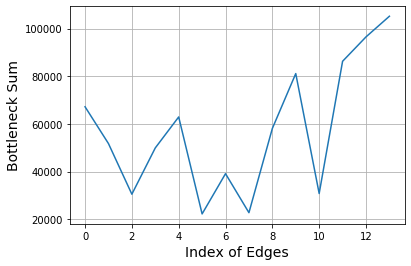

In [307]:
plt.plot(k)
plt.xlabel('Index of Edges', fontsize=14)
plt.ylabel('Bottleneck Sum', fontsize=14)
plt.grid()

e_star = np.argmax(k)
kappa = np.max(k)
bottleneck = edge_vec_G[e_star]

print("The bottleneck is", bottleneck)
print("kappa =", kappa)
print("λ_slem ≤", 1 - 1/kappa)

### (3.) Calculate the conductance h of the graph G. Verify Cheeger’s inequality:
### 1 − 2h ≤ λ_slem ≤ 1 − h^2/2.
### Computing the conductance is an NP-complete problem.

In [322]:
# Computing S and Sc:

# There are 5 states.
states = np.array([0, 1, 2, 3, 4])
n = 2**np.size(states) # The number of subsets
m = int(n/2) # Half the number of subsets

from itertools import chain, combinations
# Computes the powerset of x:
def powerset(x):
    # The powerset as a list:
    ps = list(chain.from_iterable(combinations(x,n) for n in np.arange(np.size(x)+1)))
    return np.array([np.array(xi) for xi in ps]) # Retun as a numpy array of numpy arrays

# We divide the state space Ω into two subspaces such that Ω = S ∪ Sc 
S = powerset(states) # Return the powerset
S = S[1:n] # We can remove the empty set from S.
# Sc = np.flip(S) # Flipped to match the missing parts of S.
n2 = np.shape(S)[0]
print(S)
# print(Sc)

[array([0]) array([1]) array([2]) array([3]) array([4]) array([0, 1])
 array([0, 2]) array([0, 3]) array([0, 4]) array([1, 2]) array([1, 3])
 array([1, 4]) array([2, 3]) array([2, 4]) array([3, 4]) array([0, 1, 2])
 array([0, 1, 3]) array([0, 1, 4]) array([0, 2, 3]) array([0, 2, 4])
 array([0, 3, 4]) array([1, 2, 3]) array([1, 2, 4]) array([1, 3, 4])
 array([2, 3, 4]) array([0, 1, 2, 3]) array([0, 1, 2, 4])
 array([0, 1, 3, 4]) array([0, 2, 3, 4]) array([1, 2, 3, 4])
 array([0, 1, 2, 3, 4])]


In [323]:
# Computing pi_S:

# Computing the vectors of pi values for each S:
pi_S_vec = []
for i in np.arange(n2):
    idx = S[i]
    pi_S_vec.append(pi[idx])

# Computing the sum of pi_S_vec for each S:
pi_S = np.zeros(n)
for i in np.arange(n2):
    pi_S[i+1] = np.sum(pi_S_vec[i])

pi_S = pi_S[1:n-1] # Remove the empty and complete sets

# Compute the indices where pi(S) <= 1/2
indices = np.where(pi_S <= 1/2)[0]
# Compute the values of pi(S) at these indices:
# pi_S_p = pi_S[indices]
print(indices)
# print(pi_S_p)

[ 0  1  2  3  4  5  6  7  8  9 11 13 14 17 19]


In [324]:
# This function computes Q(s,sc):
def f_Q(s,sc,K):
    Q = 0
    for x in s:
        for y in sc:
            Q += pi[x]*K[x,y]
    return Q

Conductance = 0.13333333333333336


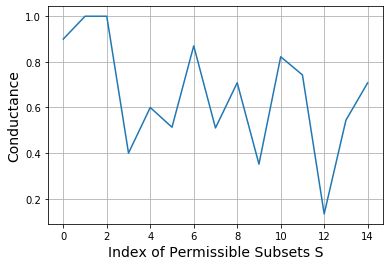

In [325]:
S2 = S[0:n-2] # Remove the complete set from S.
Sc2 = np.flip(S2) # Flipped to match the missing parts of S.

# Compute the conductance:
h_vec = np.zeros(np.shape(indices))
j = 0
for i in indices:
    h_vec[j] = f_Q(S2[i],Sc2[i],K)/pi_S[i]
    j += 1

# Plot of the conductance:
plt.plot(h_vec)
plt.xlabel('Index of Permissible Subsets S', fontsize=14)
plt.ylabel('Conductance', fontsize=14)
plt.grid()

h = min(h_vec)
print("Conductance =", h)

In [341]:
lower_bound = 1-2*h
upper_bound = 1 - (h**2)/2

print("Lower bound = ", lower_bound)
print("Upper bound = ", upper_bound)
print("λ_slem = ", lambda_slem)
print("Cheeger's inequality is satisfied.")

Lower bound =  0.7333333333333333
Upper bound =  0.991111111111111
λ_slem =  0.7730931498158939
Cheeger's inequality is satisfied.


### (4.) Now since we know π, we can design the “dream” matrix K* that converges in one step. Then λ_slem = 0 for K*.
### Rerun your code above to calculate the conductance h for K*. Verify Cheeger’s inequalities.

In [327]:
# Construct K* (K* = [pi pi ... pi].T):
K_star = np.zeros((5,5))
for i in np.arange(np.shape(K)[1]):
    K_star[i,:] = pi
K_star

array([[0.09195402, 0.20361248, 0.21674877, 0.32512315, 0.16256158],
       [0.09195402, 0.20361248, 0.21674877, 0.32512315, 0.16256158],
       [0.09195402, 0.20361248, 0.21674877, 0.32512315, 0.16256158],
       [0.09195402, 0.20361248, 0.21674877, 0.32512315, 0.16256158],
       [0.09195402, 0.20361248, 0.21674877, 0.32512315, 0.16256158]])

Conductance = 0.5123152709359601


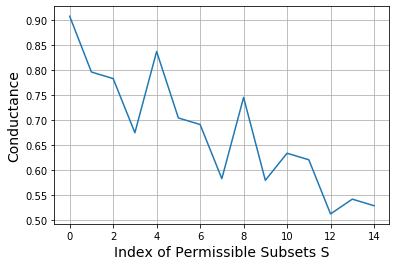

In [328]:
S2 = S[0:n-2] # Remove the complete set from S.
Sc2 = np.flip(S2) # Flipped to match the missing parts of S.

# Compute the conductance:
h_vec = np.zeros(np.shape(indices))
j = 0
for i in indices:
    h_vec[j] = f_Q(S2[i],Sc2[i],K_star)/pi_S[i]
    j += 1

# Plot of the conductance:
plt.plot(h_vec)
plt.xlabel('Index of Permissible Subsets S', fontsize=14)
plt.ylabel('Conductance', fontsize=14)
plt.grid()

h = min(h_vec)
print("Conductance =", h)

In [331]:
lower_bound = 1-2*h
upper_bound = 1 - (h**2)/2

print("Lower bound = ", lower_bound)
print("Upper bound = ", upper_bound)
print("λ_slem = ", 0)
print("Cheeger's inequalities are satisfied.")

Lower bound =  -0.024630541871920153
Upper bound =  0.868766531582907
λ_slem =  0
Cheeger's inequalities are satisfied.
